# Exploratory Data Analysis

#### Based on the file "Landslide_prediction_starternotebook", provided by the Zindi Challenge

<h2><center> Welcome to the Landslide Prediction Challenge</h2></center>

A landslide is the movement of a mass of rock, debris, or earth(soil) down a slope. As a common natural hazard, it can lead to significant losses of human lives and properties.


Hong Kong, one of the hilly and densely populated cities in the world, is frequently affected by extreme rainstorms, making it highly susceptible to rain-induced natural terrain landslides

img src = "https://drive.google.com/uc?export=view&id=1-8sSI75AG3HM89nDJEwo6_KJbAEUXS-r"

The common practice of identifying landslides is visual interpretation which, however, is labor-intensive and time-consuming.

***Thus, this hack will focus on automating the landslide identification process using artificial intelligence techniques***

This will be achieved by using high-resolution terrain information to perform the terrain-based landslide identification. Other auxiliary data such as the lithology of the surface materials and rainfall intensification factor are also provided.


<a name = "Libraries"></a>
## 1. Import relevant libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.metrics import f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

<a name = "Load"></a>
## 2. Load files

In [2]:
# Read files to pandas dataframes
data_dir = '../data/'
train = pd.read_csv(data_dir+'Train.csv')
test = pd.read_csv(data_dir+'Test.csv')
sample_submission = pd.read_csv(data_dir+'SampleSubmission.csv')

<a name = "Preview"></a>
## 3. Preview files

In [3]:
# Check the first five rows of the train set
train.head()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
0,1,130,129,127,126,123,126,125,124,122,119,122,121,119,117,115,119,117,115,114,112,116,114,113,111,110,35.26439,37.29208,33.85452,35.79576,40.31554,38.87666,39.50971,40.51059,45.83452,45.00000,36.05503,40.51059,44.56372,41.81031,38.87666,33.85452,38.87666,33.85452,33.85452,32.63194,32.63194,30.24626,30.24626,30.24626,30.24626,98.1301,113.1986,116.5650,123.6901,135.0000,97.12502,104.0362,110.5560,119.0546,126.8699,105.9454,110.5560,113.9625,116.5650,119.7449,116.5650,119.7449,116.5650,116.5650,128.6598,128.6598,120.9638,120.9638,120.9638,120.9638,0.038514,0.029463,0.031405,0.025771,0.010453,0.028321,0.027360,0.019831,0.009338,0.008806,0.021451,0.021244,0.017273,0.006708,-0.008671,0.023851,0.012586,-0.004249,0.003646,-0.006809,0.013328,0.005337,0.007039,-0.017753,-0.007777,0.013903,0.014674,0.018249,0.018368,0.003341,0.002023,0.005743,0.002238,-0.003820,-0.003302,-0.002141,0.003585,0.002025,-0.012269,-0.027184,0.000977,-0.012630,-0.031644,-0.025683,-0.037371,-0.018934,-0.021875,-0.023553,-0.048495,-0.039092,8.045186,8.333038,7.819405,8.032228,9.818933,9.295772,9.375107,9.499450,10.922910,11.001900,9.339861,9.883230,11.035840,10.298030,9.618946,8.703197,10.175750,8.651121,8.251134,8.074524,8.519887,7.989215,7.634287,7.804186,7.219216,3.173340,2.961406,3.315935,3.061250,3.246914,3.221661,3.153512,3.048637,2.915506,3.073973,3.765278,3.246664,3.154479,3.237765,3.392537,3.851345,3.673898,3.821337,3.584646,3.734637,4.003083,4.218082,3.990867,4.100921,3.715154,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1.281767,1.281743,1.281708,1.281684,1.281649,1.281780,1.281757,1.281721,1.281698,1.281662,1.281789,1.281765,1.281730,1.281707,1.281671,1.281802,1.281779,1.281743,1.281720,1.281684,1.281811,1.281788,1.281752,1.281

In [4]:
# Check the first five rows of the test set
test.head()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif
0,10865,111,109,109,110,112,117,114,113,112,113,120,120,118,116,115,122,122,122,121,120,122,122,121,121,123,45.83452,36.055030,27.01712,22.98977,27.01712,43.49152,49.490830,42.67464,30.96376,22.98977,27.017120,39.509710,44.56372,43.49152,35.26439,12.604380,11.309930,17.54840,28.30320,38.87666,5.710593,5.710593,8.049467,12.60438,26.56505,240.9454,254.05460,281.30990,315.00000,348.69010,251.56500,250.01690,257.47120,270.00000,315.00000,281.30990,255.96380,246.03750,251.56500,278.130100,296.56510,270.00000,251.56500,248.19860,277.125000,360.00000,180.00000,135.00000,333.43490,306.86990,0.035766,-0.013152,-0.037572,-0.062401,-0.055791,0.027593,0.002834,-0.038738,-0.052596,-0.035428,0.031410,0.010285,-0.030370,-0.047145,-0.030835,0.060269,0.010774,-0.009391,-0.030129,-0.029237,0.088753,0.075792,0.023841,-0.001485,-0.010110,-0.016483,-0.044767,-0.042420,-0.053476,-0.043530,0.008279,0.002710,-0.010917,-0.013603,-0.011500,0.026537,0.017282,-0.005495,-0.016250,-0.016121,0.074879,0.055460,0.042507,0.019065,-0.003870,0.024342,0.042834,0.056148,0.040106,0.021167,9.667106,8.181493,7.782584,8.776177,10.954420,8.896092,11.257830,10.227420,10.278770,8.030625,5.094675,8.138618,10.002860,11.459460,9.746919,1.718303,1.830190,4.348740,5.784863,10.840700,0.664827,0.000081,0.000261,0.846584,4.815838,2.682646,4.814003,6.252043,6.667844,6.602260,2.240095,2.561107,3.066897,5.311826,6.215635,2.774525,2.446323,2.663095,3.096692,4.132727,2.930157,4.044015,3.533233,2.135064,4.028785,4.076646,8.517193,9.857834,5.307338,3.319677,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1.310570,1.310638,1.310684,1.310752,1.310797,1.310388,1.310456,1.310502,1.310570,1.310616,1.310266,1.310335,1.310381,1.310449,1.310495,1.310084,1.310153,1.310199,1.310267,

In [5]:
# Check how the submission file should look like
sample_submission.head()

,Sample_ID,Label
0,10865,0
1,10866,0
2,10867,0
3,10868,0
4,10869,0


<a name = "Dictionary"></a>
## 4. Data Dictionary
<figure>
<img src = "https://drive.google.com/uc?export=view&id=1T_XBSH6ozmhGiDz_nL4bQvvonHUpbCfW" height = "200">
<img src = "https://drive.google.com/uc?export=view&id=13nSrrIowiFPjAgiR--Nd4cHLVwvXFaFj" height = "400">

In [6]:
# Check shape and size of train and test set
train.shape, test.shape, sample_submission.shape

((10864, 227), (5430, 226), (5430, 2))

<a name = "Summaries"></a>
## 5. Data Summaries

In [7]:
train.info(verbose=True, show_counts=True)
# too many columns to check non-null count easily

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Data columns (total 227 columns):
 #    Column        Non-Null Count  Dtype  
---   ------        --------------  -----  
 0    Sample_ID     10864 non-null  int64  
 1    1_elevation   10864 non-null  int64  
 2    2_elevation   10864 non-null  int64  
 3    3_elevation   10864 non-null  int64  
 4    4_elevation   10864 non-null  int64  
 5    5_elevation   10864 non-null  int64  
 6    6_elevation   10864 non-null  int64  
 7    7_elevation   10864 non-null  int64  
 8    8_elevation   10864 non-null  int64  
 9    9_elevation   10864 non-null  int64  
 10   10_elevation  10864 non-null  int64  
 11   11_elevation  10864 non-null  int64  
 12   12_elevation  10864 non-null  int64  
 13   13_elevation  10864 non-null  int64  
 14   14_elevation  10864 non-null  int64  
 15   15_elevation  10864 non-null  int64  
 16   16_elevation  10864 non-null  int64  
 17   17_elevation  10864 non-null  int64  
 18   18_e

In [8]:
# Check for any missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [9]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

In [10]:
# Check statistical summaries of the train set
train.describe()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
count,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,1086

In [11]:
# Check statistical summaries of the test set
test.describe()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif
count,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5.430000e+03,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5.430000e+03,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.0000

<a name = "Target"></a>
## 6. Target variable distribution

In [12]:
# Check distribution of the target variabe
train.Label.value_counts(normalize = True)

0    0.75
1    0.25
Name: Label, dtype: float64

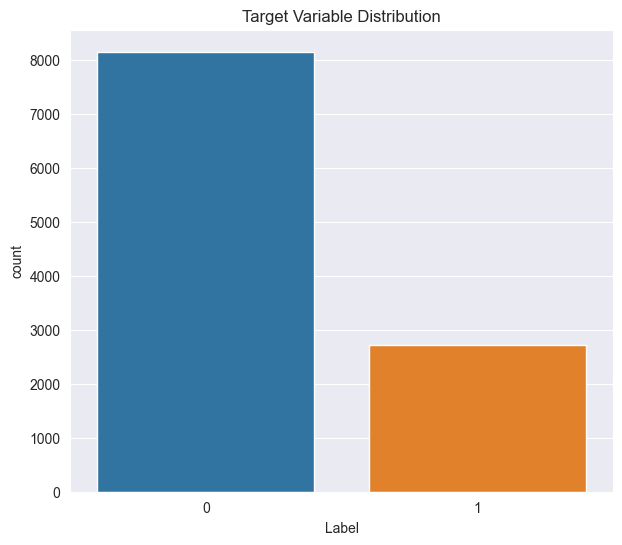

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(7, 6))
sns.countplot(x= train.Label)
plt.title('Target Variable Distribution')
plt.show()

The dataset is highly imbalanced with the majority class having 75% and the minority class 25%

Often, it is suggested to fix this class imbalance with:
 1. Using SMOTE to create synthetic data to reduce imbalanceness
 2. Undersampling the majority class
 3. Oversampling the minority class
 4. Giving more weight to minority class during modelling

However, for a given region, a landslide will be rare compared to a non-landslide, and the test set is presumably also imbalanced. Instead, in order to allow the model to work with this imbalance, based on the articles listed below, I will:
 1. chose a metric that can help account for the imbalance and focus on what we want -> F1
 2. using a probability threshold other than 0.5, based on the trade-off between false positives and false negatives

https://towardsdatascience.com/your-dataset-is-imbalanced-do-nothing-abf6a0049813
https://towardsdatascience.com/how-to-deal-with-imbalanced-classification-without-re-balancing-the-data-8a3c02353fe3


<a name = "Outliers"></a>
## 7. Outliers

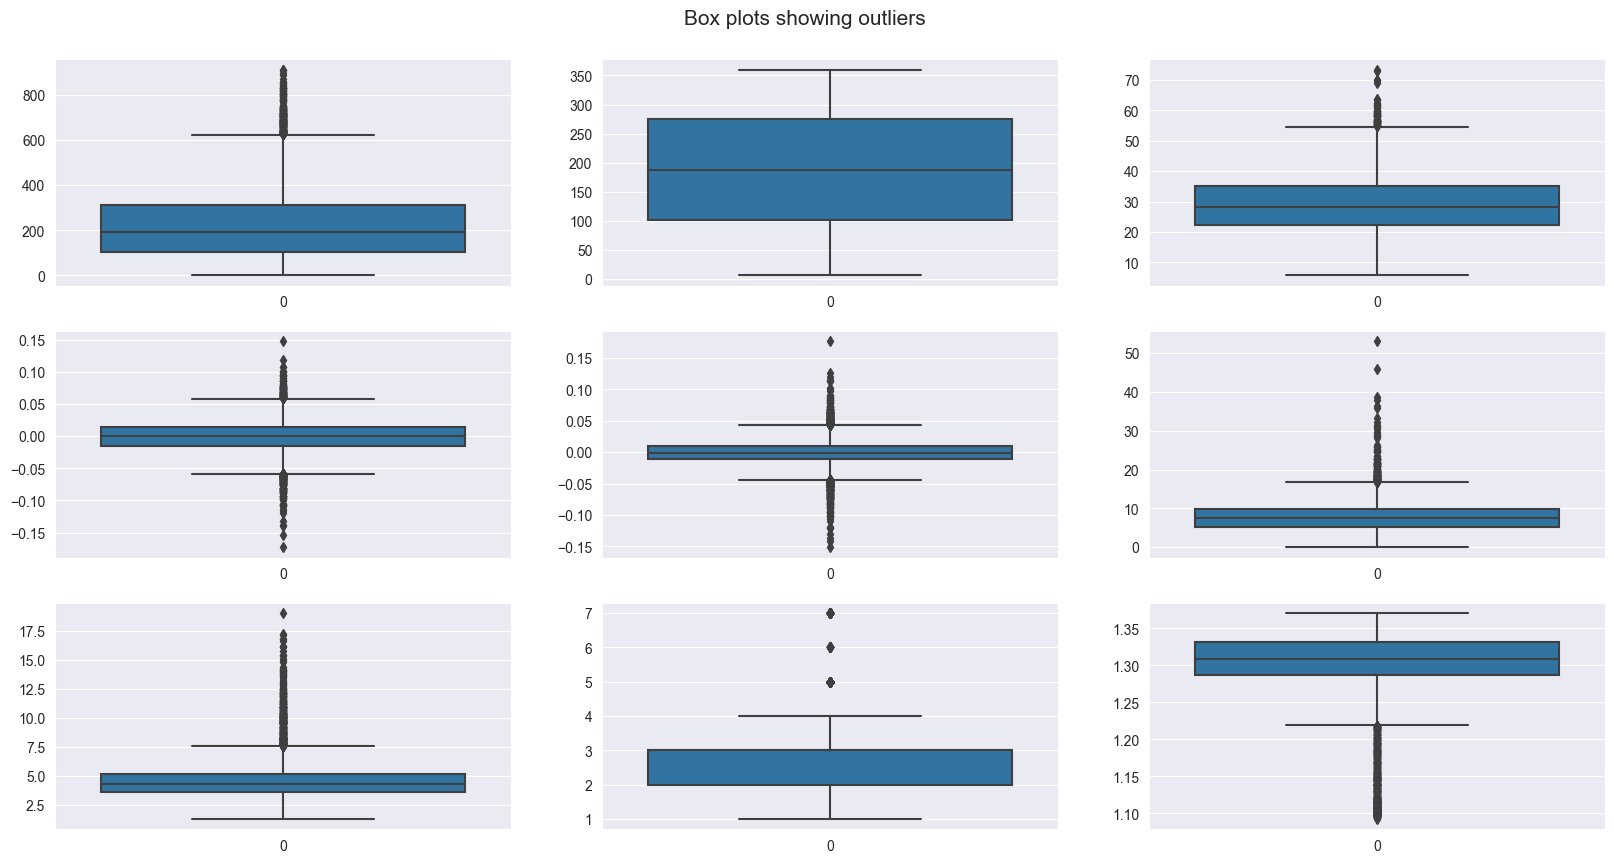

In [16]:
# Exploring some features for cell 1
explore_cols =  ['15_elevation', '15_aspect', '15_slope', '15_placurv', '15_procurv', '15_lsfactor', 
'15_twi', '15_geology', '15_sdoif']

# Plotting boxplots for each of the numerical columns
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), train, explore_cols):
  sns.boxplot(train[name], ax = ax)

#sns.boxplot(data=train[explore_cols], orient="h")

 Elevation, IsFactor, Placurv, curve and slope have some outliers.
 The aspect and geology features have few outliers.
 
 Some of the techniques you can use to handle outliers include:
  1. Log transformations, scaling, box-cox transformations...
  2. Dropping the outliers
  3. Replacing the outliers with mean, median, mode or any other aggregates

(True, False, False, True, True)

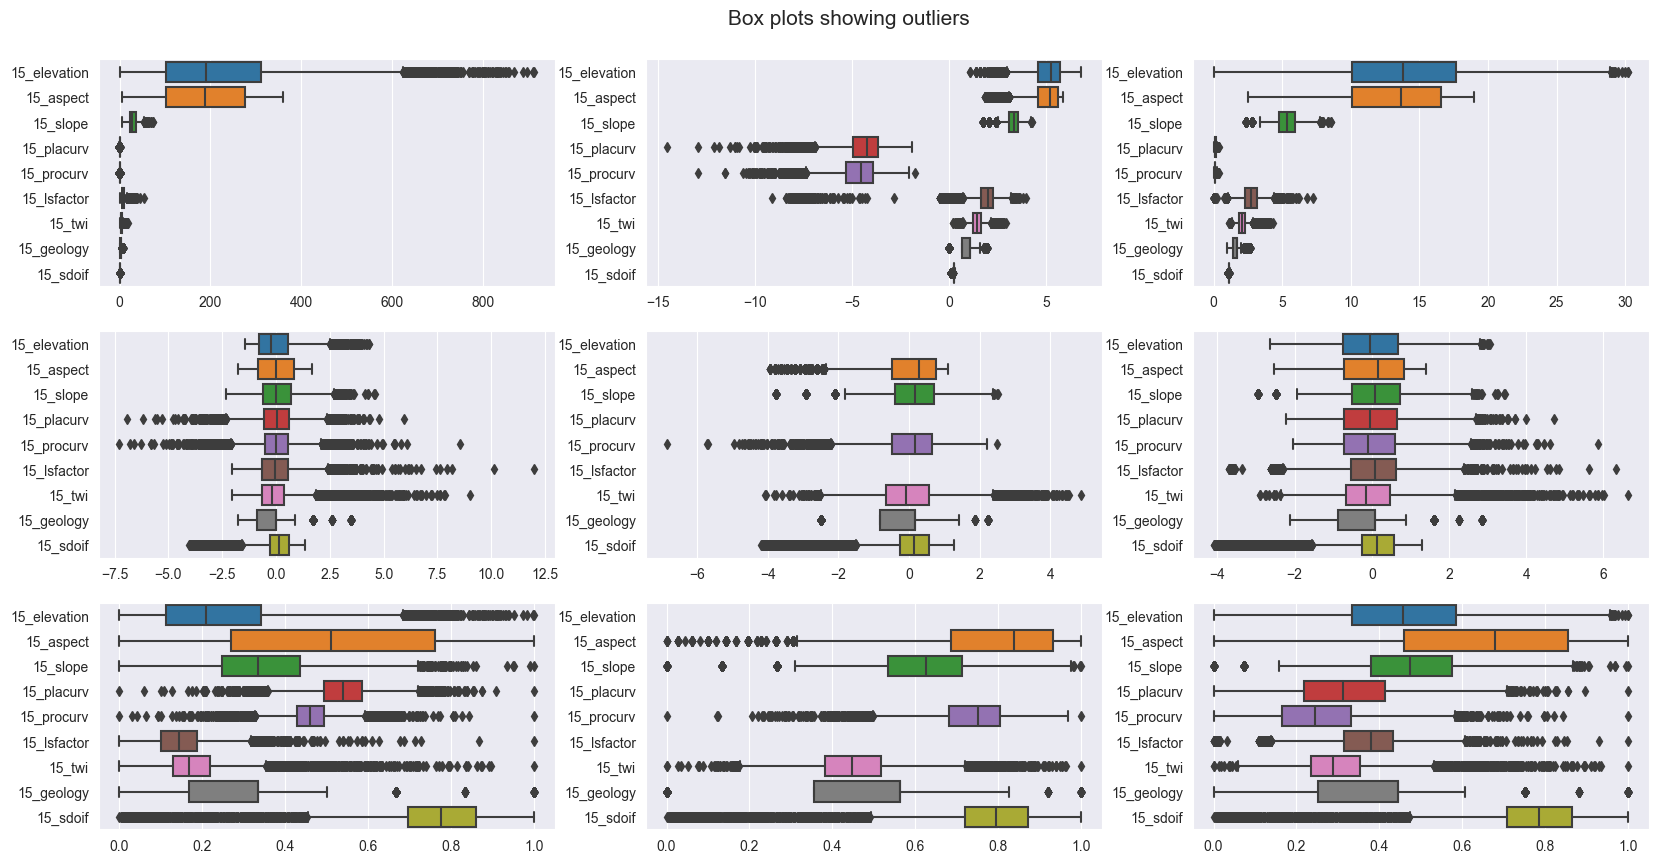

In [17]:
# testing scaling and log transformations

from sklearn.preprocessing import StandardScaler
# log of data
train_log = np.log(train)
# exponential of data
train_sqrt = np.sqrt(train)

# standardize the data before log transform
train_standardized = (train - train.mean(axis=0)) / train.std(axis=0)
# or scaling
fmax, fmin = 1, 0
train_std = (train - train.min(axis=0)) / (train.max(axis=0) - train.min(axis=0))
train_scaled = train_std * (fmax - fmin) + fmin

# log than standardize/scale
train_standardized_log = (train_log - train_log.mean(axis=0)) / train_log.std(axis=0)  
train_std = (train_log - train_log.min(axis=0)) / (train_log.max(axis=0) - train_log.min(axis=0))
train_scaled_log = train_std * (fmax - fmin) + fmin

# sqrt of standardize/scale
train_standardized_sqrt = (train_sqrt - train_sqrt.mean(axis=0)) / train_sqrt.std(axis=0)  
train_std = (train_sqrt - train_sqrt.min(axis=0)) / (train_sqrt.max(axis=0) - train_sqrt.min(axis=0))
train_scaled_sqrt = train_std * (fmax - fmin) + fmin

# fix label:
train_standardized_sqrt['Label'] = train['Label']
train_standardized['Label'] = train['Label']
train_standardized_log['Label'] = train['Label']

# Plotting boxplots for each of the numerical columns
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)
axes = axes.ravel()

sns.boxplot(data=train[explore_cols], orient="h", ax=axes[0])
sns.boxplot(data=train_log[explore_cols], orient="h", ax=axes[1])
sns.boxplot(data=train_sqrt[explore_cols], orient="h", ax=axes[2])
sns.boxplot(data=train_standardized[explore_cols], orient="h", ax=axes[3])
sns.boxplot(data=train_standardized_log[explore_cols], orient="h", ax=axes[4])
sns.boxplot(data=train_standardized_sqrt[explore_cols], orient="h", ax=axes[5])
sns.boxplot(data=train_scaled[explore_cols], orient="h", ax=axes[6])
sns.boxplot(data=train_scaled_log[explore_cols], orient="h", ax=axes[7])
sns.boxplot(data=train_scaled_sqrt[explore_cols], orient="h", ax=axes[8])

# are there missing values created by stand/scaling
train_sqrt.isnull().sum().any(), train_standardized.isnull().sum().any(), train_scaled.isnull().sum().any(),  train_standardized_sqrt.isnull().sum().any(), train_scaled_sqrt.isnull().sum().any(), 

Caption: distributions and outliers of the features for cell 15, by row = original training data, standardized data and scaled data. By column = untransformed data, log of the data, square root of the data

Notes:
- the best option seems to be taking the square root of either the standardized or scaled data. This results in fairly uniform (not too skewed) distributions and it looks like it helps pull some of the outliers towards the mean, so they are less of an outlier. The main exception being twi.
- however, taking the sqrt or log introduces missing values in the data (nan)
- open questions: is an outlier in one variable, an outlier in another? is an outlier related to a landslide? are records with outliers a significant portion of the dataset? are these still outliers relative to the full dataset (ie not just outlier in geology values of cell 15, but in all cells)


### Are the outliers a significant portion of the dataset?




In [18]:
from scipy.stats import zscore, boxcox

# determine an outlier threshold using zscore

# Calculate data loss based on outlier_thresh standard deviations
outlier_thresh = 3.5
num_outlier = len(train[(np.abs(zscore(train)) > outlier_thresh).any(axis=1)]) / len(train) * 100
print(f'{len(train[(np.abs(zscore(train)) > outlier_thresh).any(axis=1)])} rows of {len(train)} total rows contain outliers.')
print(f'Percentage of data loss: {num_outlier:.2f}%')

num_outlier = len(train_standardized[(np.abs(zscore(train_standardized)) > outlier_thresh).any(axis=1)]) / len(train_standardized) * 100
print(f'{len(train_standardized[(np.abs(zscore(train_standardized)) > outlier_thresh).any(axis=1)])} rows of {len(train_standardized)} total rows contain outliers.')
print(f'Percentage of data loss: {num_outlier:.2f}%')

num_outlier = len(train_scaled[(np.abs(zscore(train_scaled)) > outlier_thresh).any(axis=1)]) / len(train_scaled) * 100
print(f'{len(train_scaled[(np.abs(zscore(train_scaled)) > outlier_thresh).any(axis=1)])} rows of {len(train_scaled)} total rows contain outliers.')
print(f'Percentage of data loss: {num_outlier:.2f}%')

num_outlier = len(train_log[(np.abs(zscore(train_log)) > outlier_thresh).any(axis=1)]) / len(train_log) * 100
print(f'{len(train_log[(np.abs(zscore(train_log)) > outlier_thresh).any(axis=1)])} rows of {len(train_log)} total rows contain outliers.')
print(f'Percentage of data loss: {num_outlier:.2f}%')

num_outlier = len(train_scaled_sqrt[(np.abs(zscore(train_scaled_sqrt)) > outlier_thresh).any(axis=1)]) / len(train_scaled_sqrt) * 100
print(f'{len(train_scaled_sqrt[(np.abs(zscore(train_scaled_sqrt)) > outlier_thresh).any(axis=1)])} rows of {len(train_scaled_sqrt)} total rows contain outliers.')
print(f'Percentage of data loss: {num_outlier:.2f}%')

num_outlier = len(train_standardized_sqrt[(np.abs(zscore(train_standardized_sqrt)) > outlier_thresh).any(axis=1)]) / len(train_standardized_sqrt) * 100
print(f'{len(train_standardized_sqrt[(np.abs(zscore(train_standardized_sqrt)) > outlier_thresh).any(axis=1)])} rows of {len(train_standardized_sqrt)} total rows contain outliers.')
print(f'Percentage of data loss: {num_outlier:.2f}%')



2544 rows of 10864 total rows contain outliers.
Percentage of data loss: 23.42%
2544 rows of 10864 total rows contain outliers.
Percentage of data loss: 23.42%
2544 rows of 10864 total rows contain outliers.
Percentage of data loss: 23.42%
2676 rows of 10864 total rows contain outliers.
Percentage of data loss: 24.63%
1750 rows of 10864 total rows contain outliers.
Percentage of data loss: 16.11%
1750 rows of 10864 total rows contain outliers.
Percentage of data loss: 16.11%


- over 20% of records contain outliers, so they account for an important part of the dataset, ie can't just drop them
- however, taking sqrt of standardized/scaled reduces to 16%

### Are the outliers related to the occurrence of a landslide?

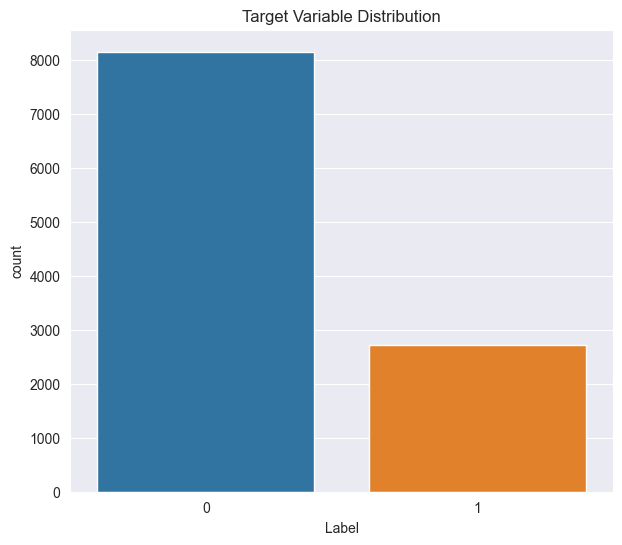

0    0.75
1    0.25
Name: Label, dtype: float64

In [19]:
# isolate outliers and determine if they are related to occurrence of landslide

# Calculate z-score and query dataframe to isolate rows with z-scores > 3.5
train_outliers = train_standardized_sqrt[~(np.abs(zscore(train_standardized_sqrt.select_dtypes(exclude='object'))) < 3.5).all(axis=1)]

sns.set_style('darkgrid')
plt.figure(figsize=(7, 6))
sns.countplot(x= train_outliers.Label)
plt.title('Target Variable Distribution')
plt.show()

# Check distribution of the target variabe
train_outliers.Label.value_counts(normalize = True)

- about 25% of records with outliers match the occurrence of a landslide. So records with outliers are an important part of the dataset, and dropping or replacing them (mean, mode, etc.) may be risky. 

### How does number of outliers change if we calculate mean for all cells instead of one cell?



In [20]:
# for each feature, get overall zscore of all cells

feat_strs = ['elevation', 'aspect', 'slope', 'placurv', 'procurv', 'lsfactor', 'twi', 'geology', 'sdoif']

for fs in feat_strs:

    placurv = train_standardized_sqrt.filter(regex=fs)
    mu_placurv = placurv.values.mean()
    sd_placurv = placurv.values.std(ddof=1)    # numpy default degrees of freedom is zero
    zscore_placurv =  (placurv - mu_placurv) / sd_placurv

    # Calculate data loss based on outlier_thresh standard deviations
    outlier_thresh = 3.5
    num_outlier = len(placurv[(np.abs(zscore_placurv) > outlier_thresh).any(axis=1)]) / len(placurv) * 100
    #print(f'{len(placurv[(np.abs(zscore_placurv) > outlier_thresh).any(axis=1)])} rows of {len(placurv)} total rows contain outliers.')
    print('FOR ', fs)
    print(f'Percentage of data loss by feature: {num_outlier:.2f}%')

    num_outlier = len(placurv[(np.abs(zscore(placurv)) > outlier_thresh).any(axis=1)]) / len(placurv) * 100
    #print(f'{len(placurv[(np.abs(zscore(placurv)) > outlier_thresh).any(axis=1)])} rows of {len(placurv)} total rows contain outliers.')
    print(f'Percentage of data loss by column: {num_outlier:.2f}%')

FOR  elevation
Percentage of data loss by feature: 0.00%
Percentage of data loss by column: 0.00%
FOR  aspect
Percentage of data loss by feature: 0.00%
Percentage of data loss by column: 0.00%
FOR  slope
Percentage of data loss by feature: 0.02%
Percentage of data loss by column: 0.02%
FOR  placurv
Percentage of data loss by feature: 0.00%
Percentage of data loss by column: 0.00%
FOR  procurv
Percentage of data loss by feature: 0.00%
Percentage of data loss by column: 0.00%
FOR  lsfactor
Percentage of data loss by feature: 11.63%
Percentage of data loss by column: 11.63%
FOR  twi
Percentage of data loss by feature: 10.19%
Percentage of data loss by column: 10.19%
FOR  geology
Percentage of data loss by feature: 0.00%
Percentage of data loss by column: 0.00%
FOR  sdoif
Percentage of data loss by feature: 2.66%
Percentage of data loss by column: 2.66%


### as above but combining all the features to see if outliers are clumped into cells (ie if an outlier is found for one feature of a cell, it is found in many features)

In [24]:
# using standardized , but not square root because of missing data

# now use method from above to create dataframe with outliers dropped:

feat_strs = ['elevation', 'aspect', 'slope', 'placurv', 'procurv', 'lsfactor', 'twi', 'geology', 'sdoif']

new_zscore_list = []
new_train_list = []
for fs in feat_strs:

    placurv = train_standardized.filter(regex=fs)
    mu_placurv = placurv.values.mean()
    sd_placurv = placurv.values.std(ddof=1)    # numpy default degrees of freedom is zero
    zscore_placurv =  (placurv - mu_placurv) / sd_placurv

    new_zscore_list.append(zscore_placurv)
    new_train_list.append(placurv)

new_zscore = pd.concat(new_zscore_list, axis=1)
new_train_standardized = pd.concat(new_train_list, axis=1)

# Calculate data loss based on outlier_thresh standard deviations
outlier_thresh = 3.5
num_outlier = len(new_train_standardized[(np.abs(new_zscore) > outlier_thresh).any(axis=1)]) / len(new_train_standardized) * 100
print(f'{len(new_train_standardized[(np.abs(new_zscore) > outlier_thresh).any(axis=1)])} rows of {len(new_train_standardized)} total rows contain outliers.')
print(f'Percentage of data loss: {num_outlier:.2f}%')

2544 rows of 10864 total rows contain outliers.
Percentage of data loss: 23.42%


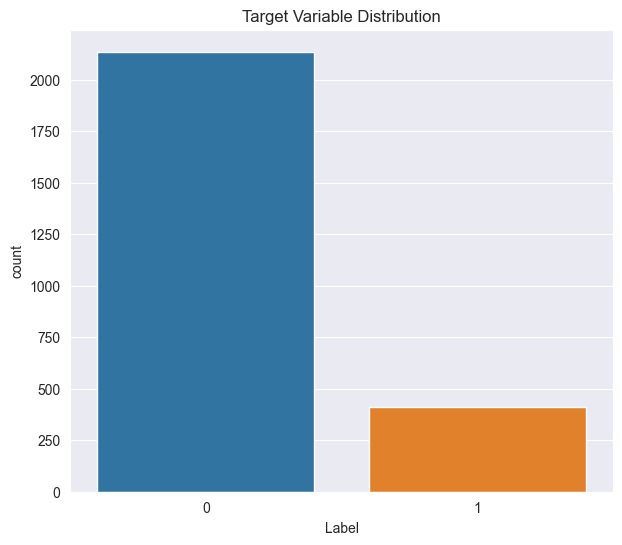

0    0.83923
1    0.16077
Name: Label, dtype: float64

In [25]:
# check if remaining outliers are a significant portion of Label=1, ie can't be dropped
# Calculate z-score and query dataframe to isolate rows with z-scores > 3.5

new_train_standardized['Label'] = train.Label

new_train_outliers = new_train_standardized[~(np.abs(new_zscore) < 3.5).all(axis=1)]

sns.set_style('darkgrid')
plt.figure(figsize=(7, 6))
sns.countplot(x= new_train_outliers.Label)
plt.title('Target Variable Distribution')
plt.show()

# Check distribution of the target variabe
new_train_outliers.Label.value_counts(normalize = True)

In [26]:
# fraction of records without landslide (label=0) that have outliers
new_train_outliers.Label.value_counts()[0]/train.shape[0]


0.19652061855670103

- using an overal mean only reduces the number of cases from 25 to 23%, but they are still numerous 
- of the records with an outlier, about 16% are linked with a landslide
- of the records without a landslide but with an outlier is > 19%

#### Conclusions: there is no easy solution for the outliers, and they seem to be an important part of the dataset. Therefore setup two datasets for comparison:
- standardized
- standardized with outliers set to 3.5 standard deviations

<a name = "Correlations"></a>
## 8. Correlations

<Figure size 2000x1200 with 0 Axes>

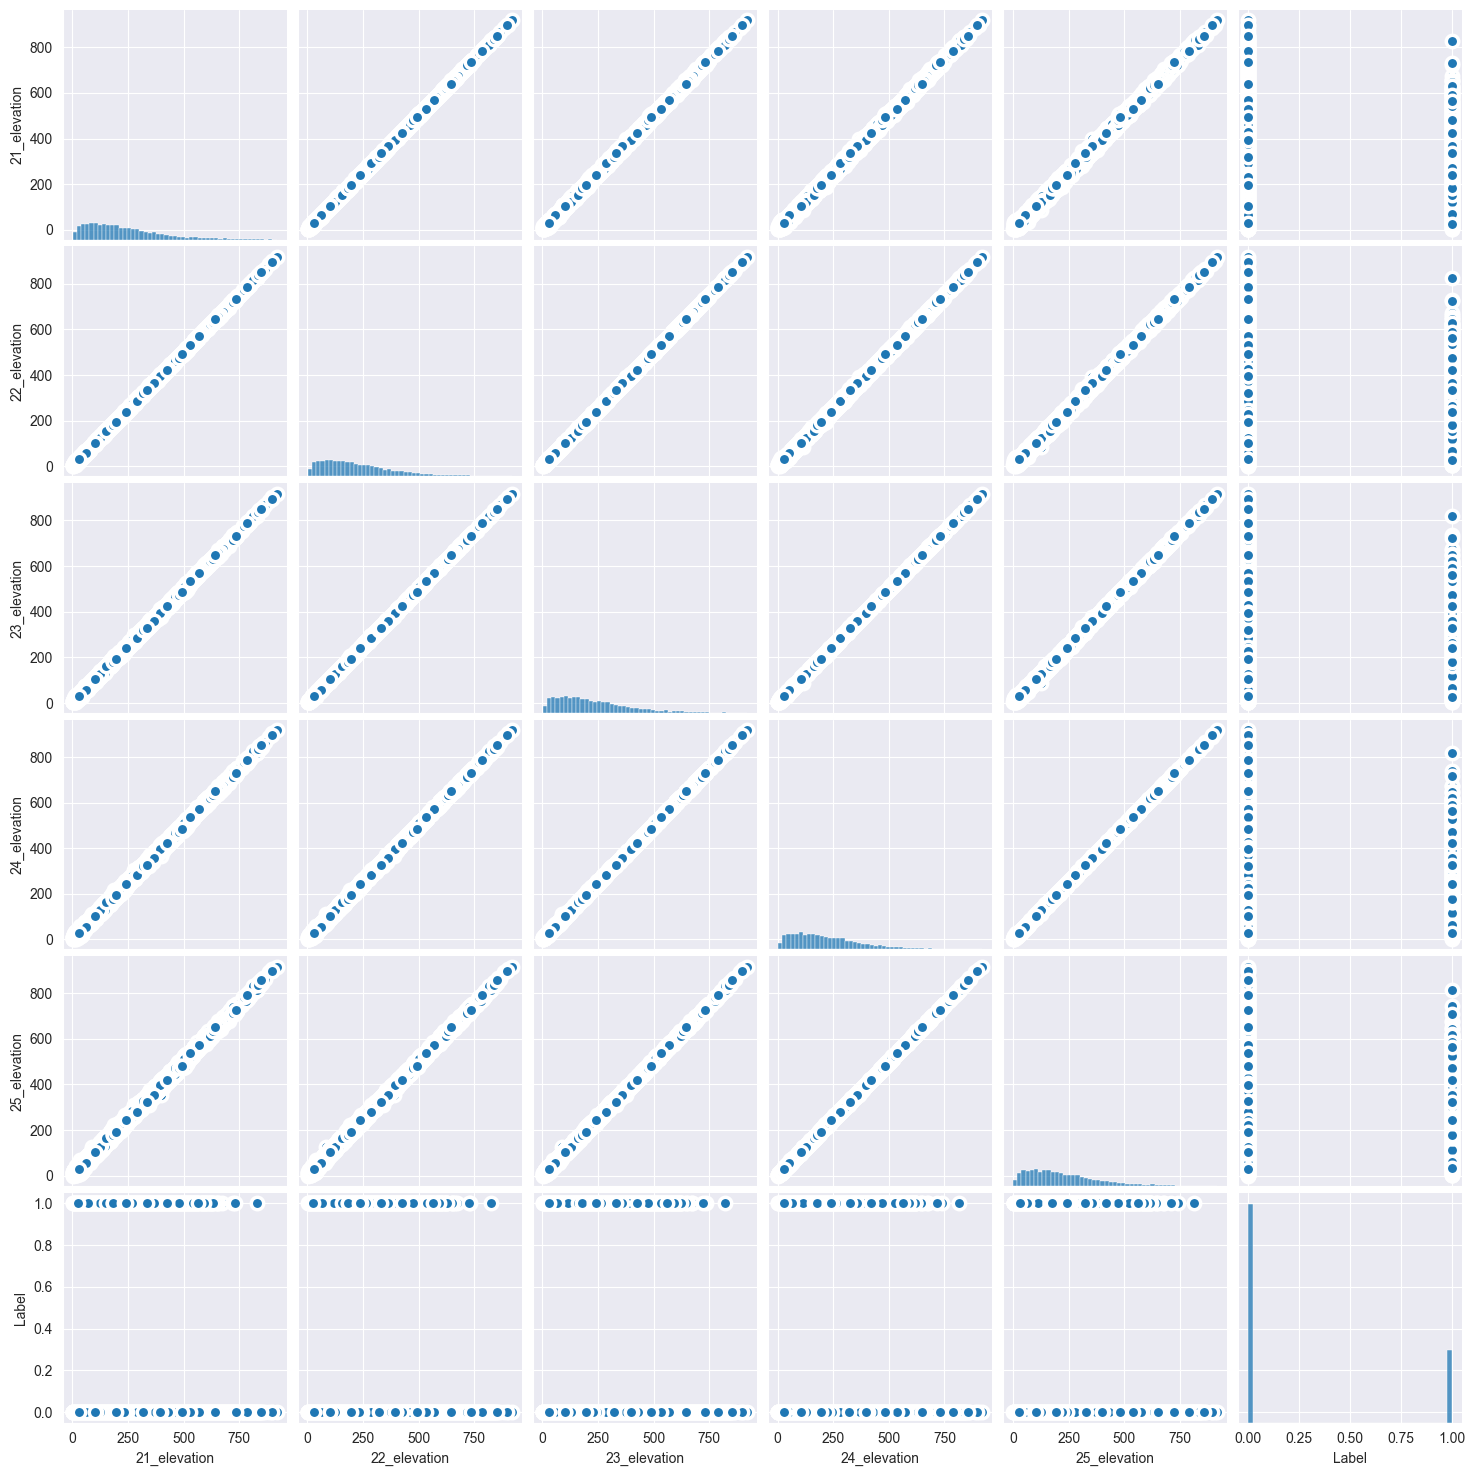

In [27]:
# Elevation correlations
plt.figure(figsize = (20, 12))
sample_elevations = ['1_elevation',	'2_elevation',	'3_elevation',	'4_elevation',	'5_elevation']
sample_elevations = ['21_elevation',	'22_elevation',	'23_elevation',	'24_elevation',	'25_elevation', 'Label']
sns.pairplot(train[sample_elevations], kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

 - There is a very high correlation between features extracted from the same location

<Figure size 2000x1200 with 0 Axes>

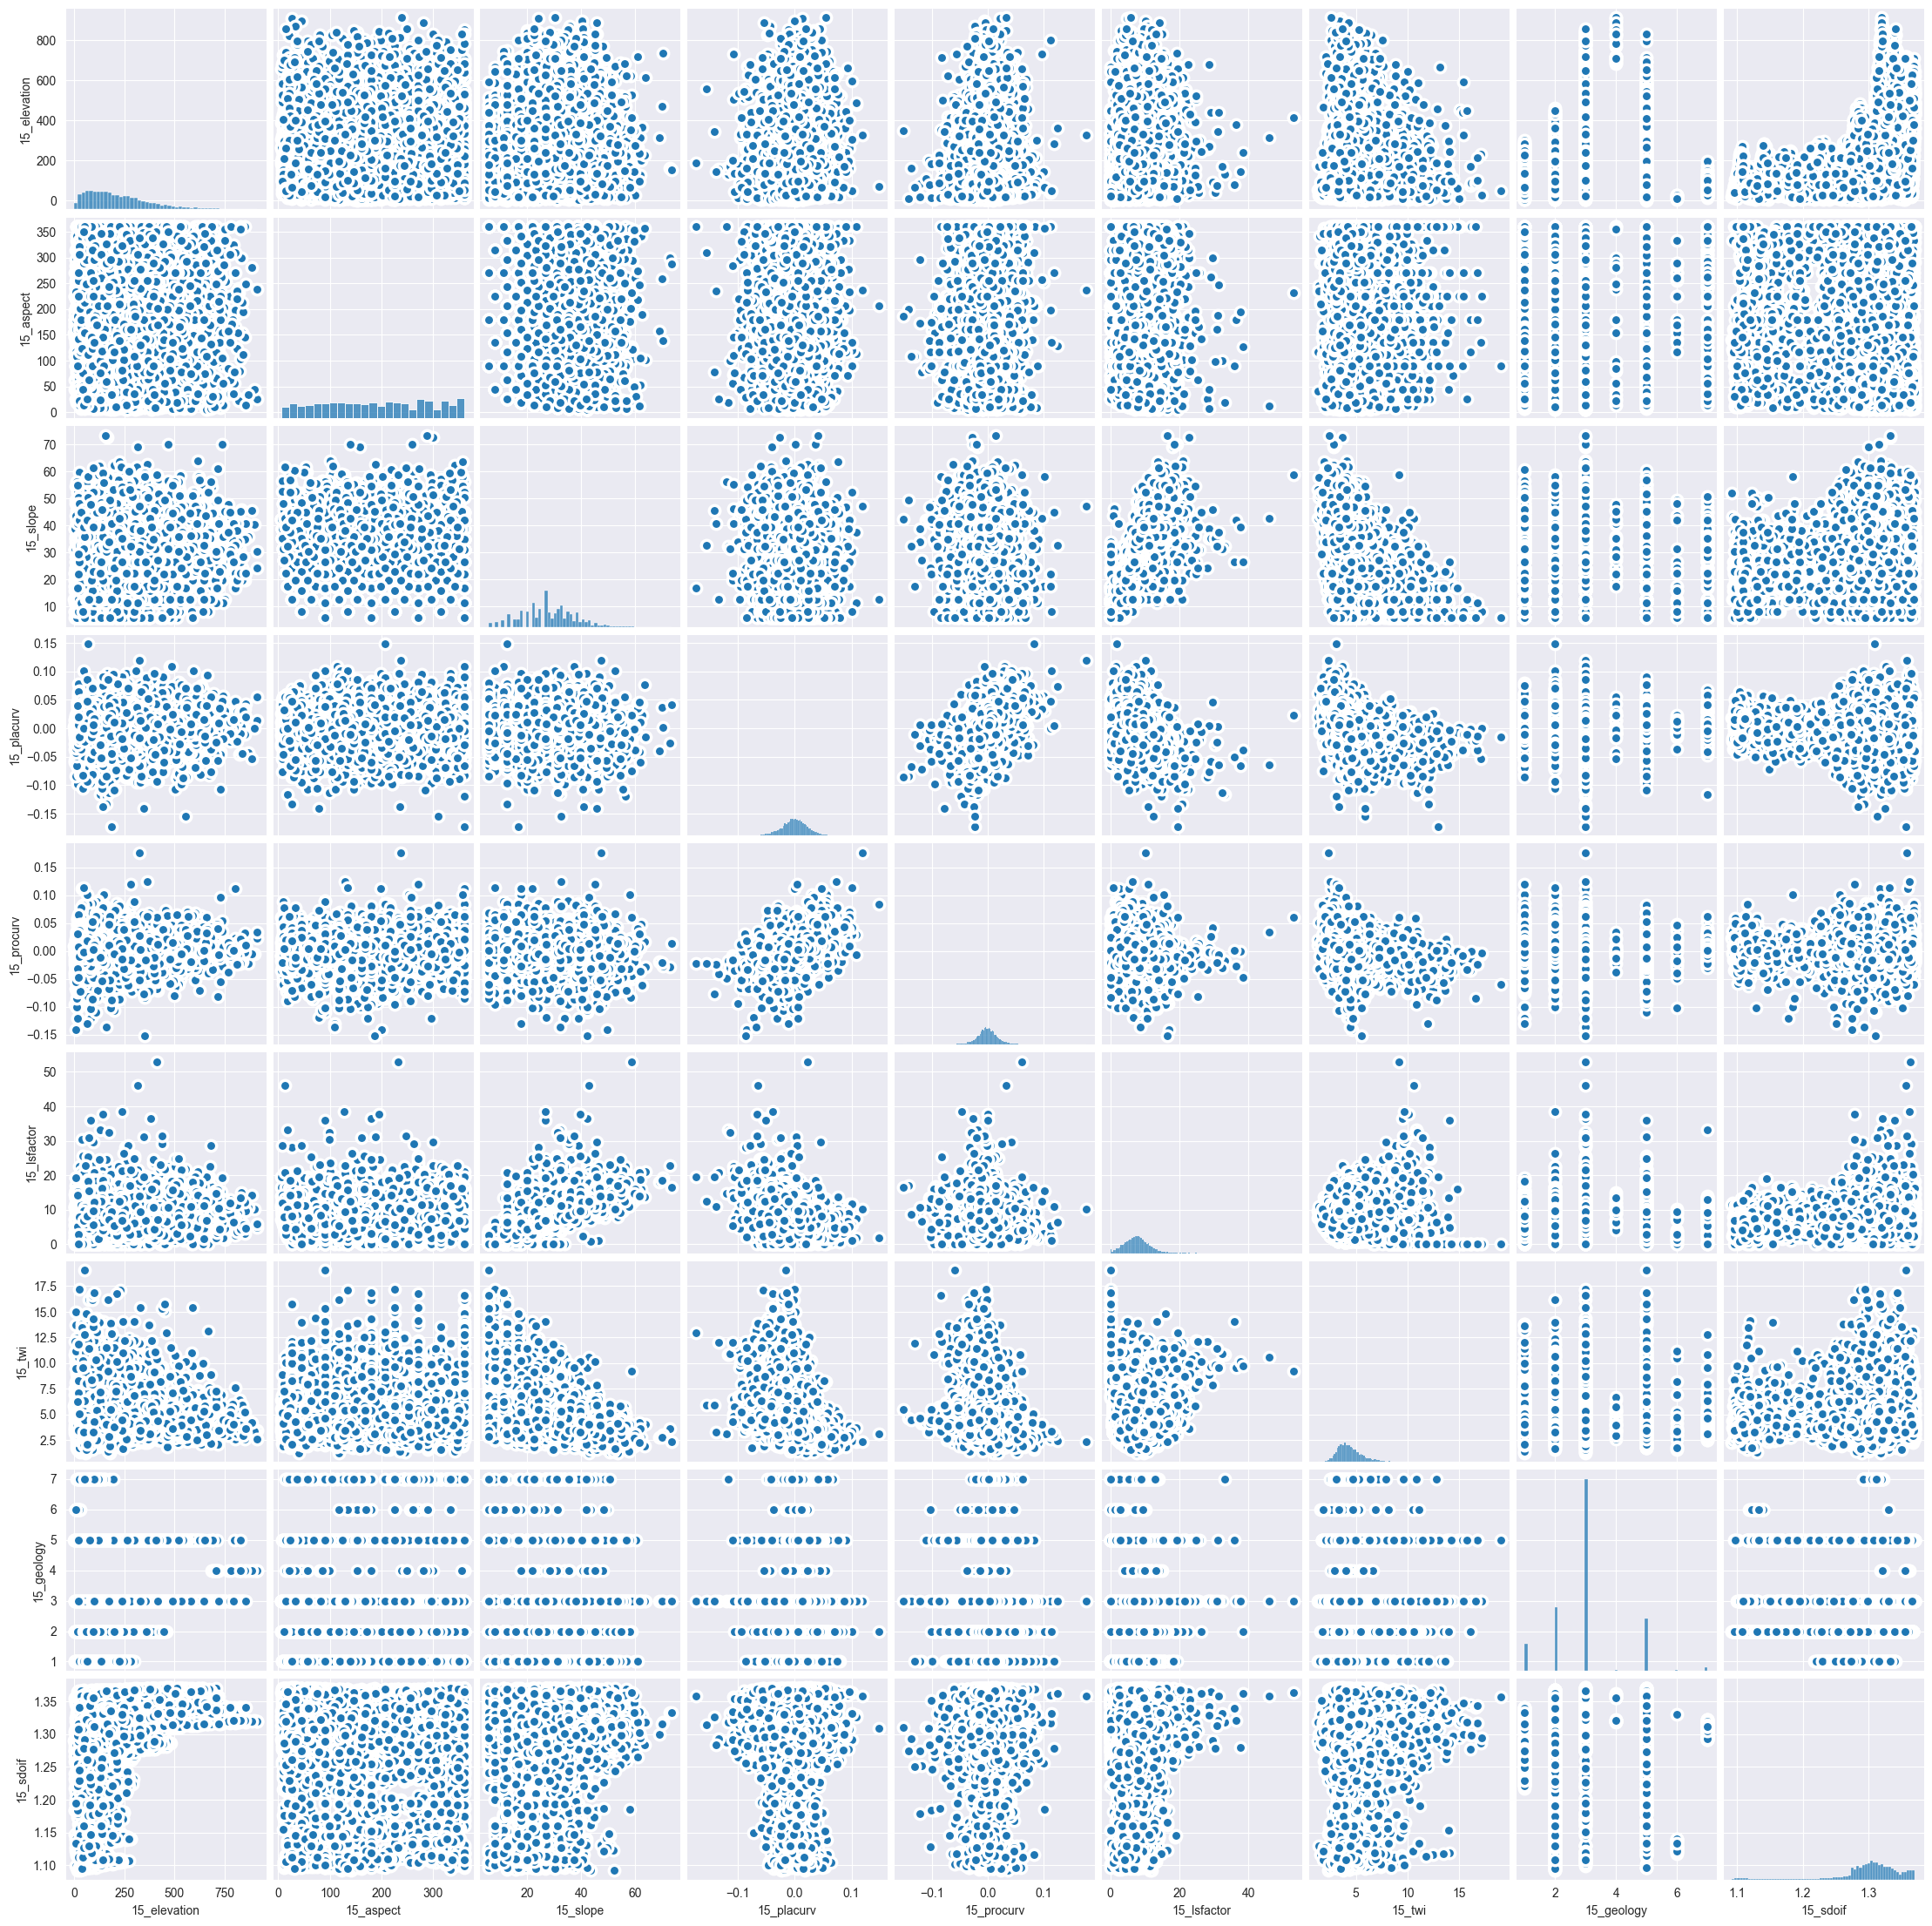

In [28]:
#explore_cols.append('Label')

# Type of correlations 
plt.figure(figsize = (20, 12))
sns.pairplot(train[explore_cols], kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

- There is no correlation for most of the features, how can you capture this information for modelling...
- the highest values of most features are only related to a Label = 0, not a landslide occurrence

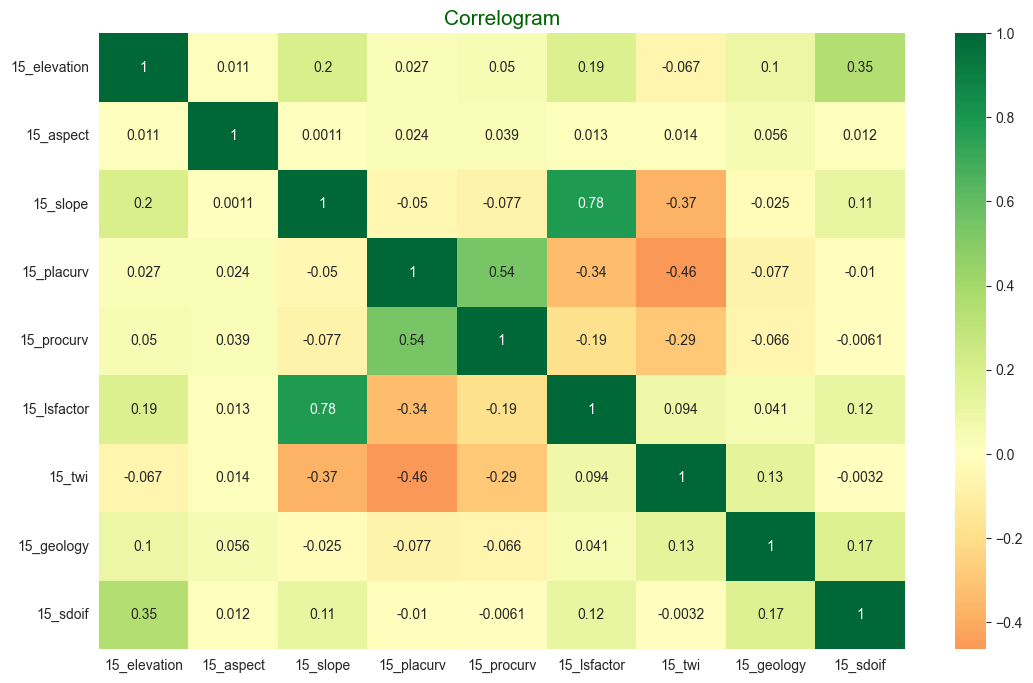

In [29]:
# Quantify correlations
corr = train[explore_cols].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

 - There is a strong positive correlation of approximately 0.8 between slope and IsFactor; this is not surprising since lsFactor is a factor of length and slope
 - procurv and placurv because they are both related to slope
 - There are other correlations (e.g. Isfactor and placurv) but they are too low to be able to interpret them as important
 - the label does not have any particularly strong correlation. The strongest is with slope, and since it is positive, the higher the slope values (steeper) the higher the Label = 1 = occurrence of landslide.

 #### Conclusion
- correlation between features worsens interpretation and can cause extrapolation (getting outside of reality)
- therefore, try dropping lsFactor to see if it improves model (it seems that keeping slope is a priority)


#### so if we drop lsfactor, how do the outliers look?

In [30]:
# using standardized , but not square root because of missing data

# now use method from above to create dataframe with outliers dropped:

feat_strs = ['elevation', 'aspect', 'slope', 'placurv', 'procurv', 'twi', 'geology', 'sdoif']

new_zscore_list = []
new_train_list = []
for fs in feat_strs:

    placurv = train_standardized.filter(regex=fs)
    mu_placurv = placurv.values.mean()
    sd_placurv = placurv.values.std(ddof=1)    # numpy default degrees of freedom is zero
    zscore_placurv =  (placurv - mu_placurv) / sd_placurv

    new_zscore_list.append(zscore_placurv)
    new_train_list.append(placurv)

new_zscore = pd.concat(new_zscore_list, axis=1)
new_train_standardized = pd.concat(new_train_list, axis=1)

# Calculate data loss based on outlier_thresh standard deviations
outlier_thresh = 3.5
num_outlier = len(new_train_standardized[(np.abs(new_zscore) > outlier_thresh).any(axis=1)]) / len(new_train_standardized) * 100
print(f'{len(new_train_standardized[(np.abs(new_zscore) > outlier_thresh).any(axis=1)])} rows of {len(new_train_standardized)} total rows contain outliers.')
print(f'Percentage of data loss: {num_outlier:.2f}%')

2358 rows of 10864 total rows contain outliers.
Percentage of data loss: 21.70%


- still not a big improvement